## Ultraspherial spectral method

In [1]:
using ClassicalOrthogonalPolynomials, Plots, Test

T = ChebyshevT()
C = Ultraspherical(2) # orthogonal wrt (1-x^2)^(3/2)
x = axes(T,1) # quasi-vector for f(x) = x

D₂ = C \ diff(T,2) # second derivative of Chebyshev polynomial
V = C \ (x .^2 .* T) # x^2 * Chebyshev polynomial

q = transform(T, exp) # Chebyshev T coefficients of exp(x)
@test (C * (D₂ * q))[0.1] ≈ exp(0.1) # second derivative of exp at 0.1
@test (C * (V * q))[0.1] ≈ 0.1^2 * exp(0.1) # x^2 * exp(x) at 0.1

Test Passed

In [2]:
L = D₂ + V
@test (C * (L * q))[0.1] ≈ exp(0.1) + 0.1^2 * exp(0.1) # u'' + x^2 *u for u =  exp(x) at 0.1
@test T[[-1,1],:] * q ≈ [exp(-1), exp(1)] # Chebyshev T coefficients of exp at -1 and 1

Test Passed

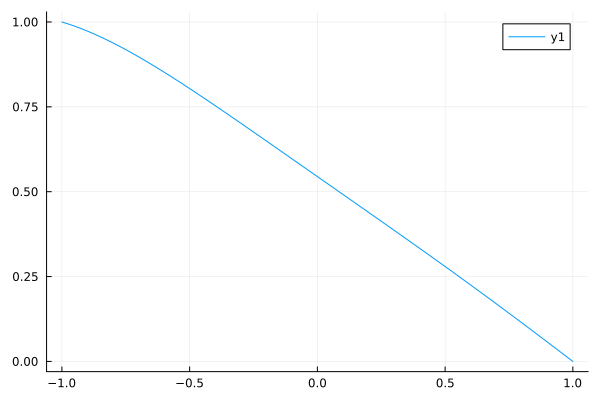

In [3]:
u = [T[[-1,1],:]; L] \ [1; 0; zeros(∞)] # Solve u'' + x^2 * u = 0 with u(-1) = 1, u(1) = 0

plot(T*u)

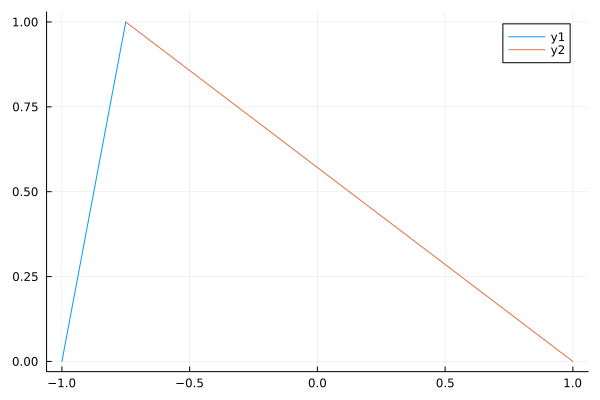

In [ ]:
#To use other intervals, we use:

y = -0.75
T = chebyshevt(-1..y)
C = ultraspherical(2,-1..y)

T₂ = chebyshevt(y..1)
C₂ = ultraspherical(2, y..1)

x = axes(T,1) # quasi-vector for f(x) = x
D₂ = C \ diff(T,2) # second derivative of Chebyshev polynomial
V = C \ (x .^2 .* T) # x^2 * Chebyshev polynomial

L = D₂# + V


uₗ = [T[[begin, end],:]; L] \ [0; 1; zeros(∞)] # Solve u'' + x^2 * u = 0 with u(-1) = 0, u(y) = 1
uᵣ = [T₂[[begin, end],:]; L] \ [1; 0; zeros(∞)]

plot(T*uₗ)
plot!(T₂*uᵣ)

#diff(T*uₗ)[y]